In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/R03_25")
# dataset = pd.read_csv("./R03_25")


In [ ]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [ ]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [ ]:
data = dataset.iloc[:,:8]
data['label'] = dataset['label']

In [ ]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,0


In [ ]:
data.shape

(493200, 9)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]


In [ ]:
train_accuracies = []
val_accuracies = []

In [ ]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, validation_split=0.1,epochs=1, callbacks=[early_stopping])
    train_accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])


epoch 1/100
11097/11097 [==============================] - 138s 11ms/step - loss: 1.0332 - accuracy: 0.5022 - val_loss: 1.0197 - val_accuracy: 0.5077
epoch 2/100
11097/11097 [==============================] - 129s 12ms/step - loss: 1.0175 - accuracy: 0.5116 - val_loss: 1.0017 - val_accuracy: 0.5187
epoch 3/100
11097/11097 [==============================] - 116s 10ms/step - loss: 1.0061 - accuracy: 0.5188 - val_loss: 0.9923 - val_accuracy: 0.5236
epoch 4/100
11097/11097 [==============================] - 116s 10ms/step - loss: 0.9960 - accuracy: 0.5246 - val_loss: 0.9805 - val_accuracy: 0.5313
epoch 5/100
11097/11097 [==============================] - 118s 11ms/step - loss: 0.9869 - accuracy: 0.5290 - val_loss: 0.9734 - val_accuracy: 0.5345
epoch 6/100
11097/11097 [==============================] - 117s 11ms/step - loss: 0.9794 - accuracy: 0.5331 - val_loss: 0.9640 - val_accuracy: 0.5382
epoch 7/100
11097/11097 [==============================] - 118s 11ms/step - loss: 0.9731 - accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.8686
Test Accuracy: 0.5978


In [ ]:
print(train_accuracies)
print(val_accuracies)

[0.5021740198135376, 0.5116219520568848, 0.518842339515686, 0.5246294140815735, 0.5290365815162659, 0.5331057906150818, 0.5370286107063293, 0.5401995182037354, 0.5441166758537292, 0.5464258193969727, 0.5487885475158691, 0.5509822368621826, 0.5519453287124634, 0.5543221235275269, 0.5551810264587402, 0.5577211380004883, 0.5585575103759766, 0.559678316116333, 0.5607821941375732, 0.5631786584854126, 0.5637137293815613, 0.5643755197525024, 0.5663045048713684, 0.5675294995307922, 0.5686728358268738, 0.5684700608253479, 0.5695570707321167, 0.5718662738800049, 0.5712748765945435, 0.5723112225532532, 0.573462963104248, 0.5726012587547302, 0.5746485590934753, 0.5752849578857422, 0.5757637023925781, 0.5772449970245361, 0.5774561762809753, 0.5778757929801941, 0.5785431861877441, 0.5789064764976501, 0.5796245336532593, 0.5807172060012817, 0.5803679823875427, 0.5814775228500366, 0.5806439518928528, 0.5820519924163818, 0.5825785994529724, 0.5834347009658813, 0.5835050940513611, 0.5842654705047607, 0.

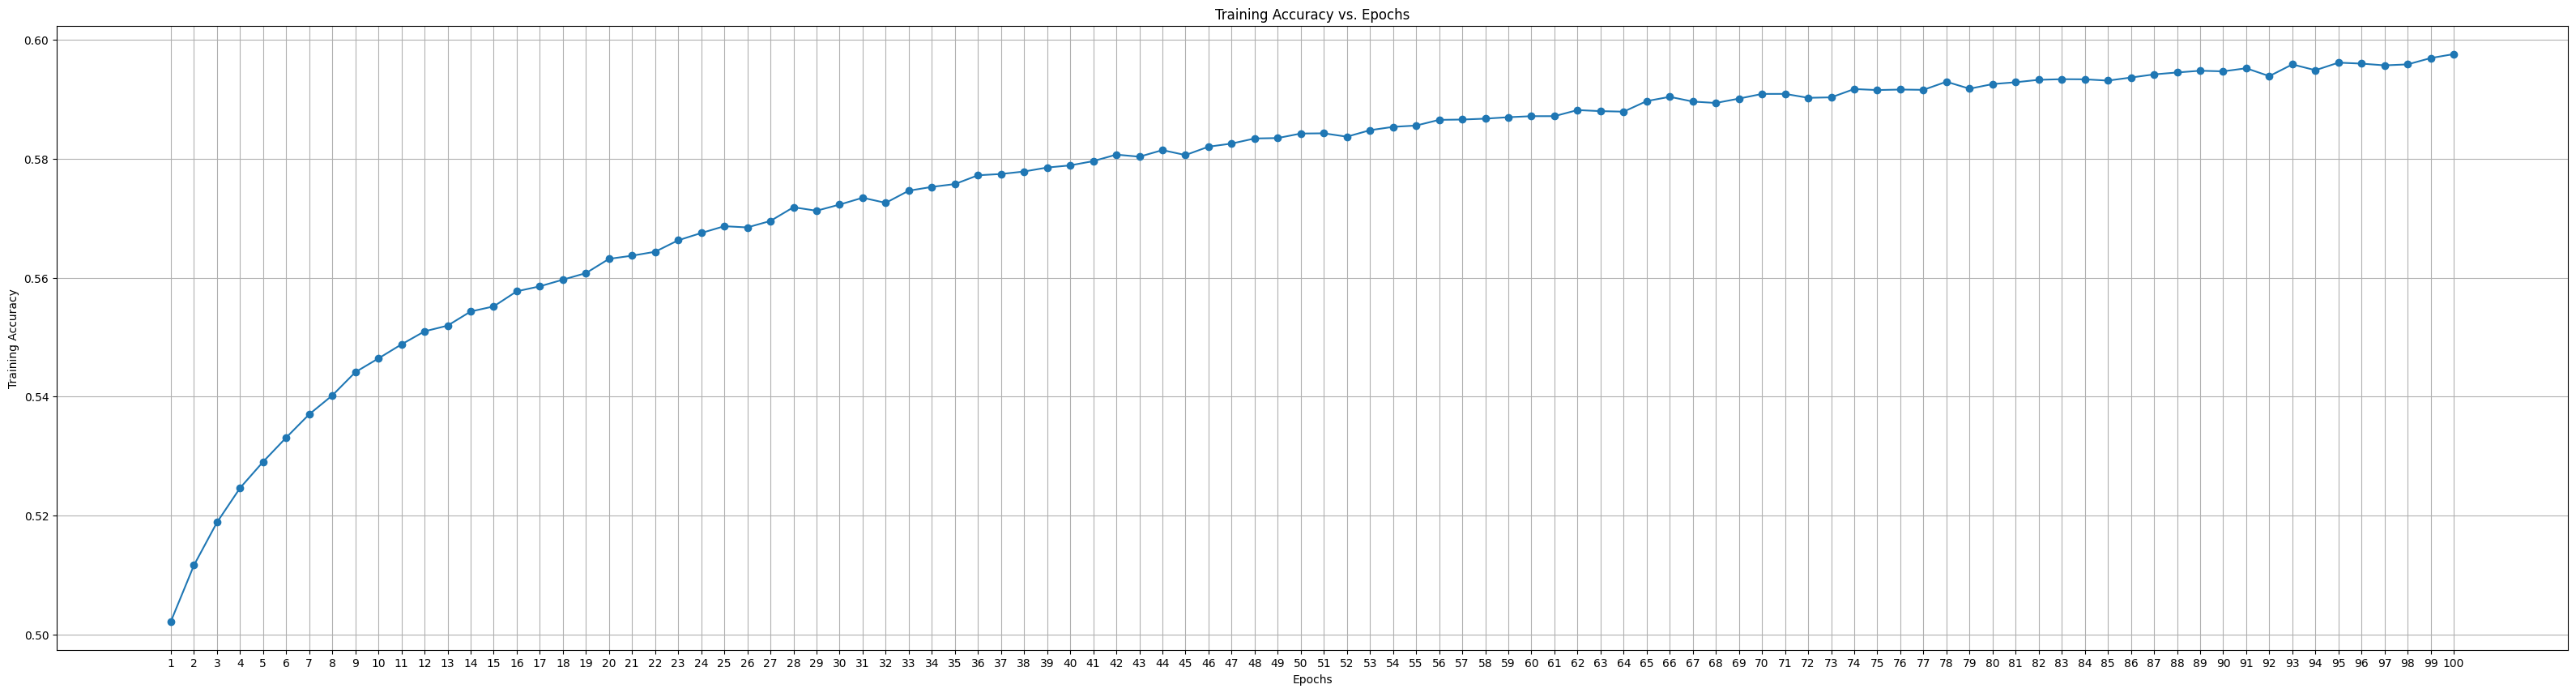

In [ ]:
epochs_list = [i for i in range(1,100+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [ ]:
print(sum(train_accuracies))

57.67469799518585


In [ ]:
print(max(train_accuracies))

0.5976333618164062


In [ ]:
y_test_data = np.array(Y_test)

y_test_data.shape

(98640,)

In [ ]:
from sklearn.metrics import accuracy_score

input_data = np.array(X_test_reshaped[2390]).reshape(1,X_test_reshaped[0].shape[0], X_test_reshaped[0].shape[1])

print(input_data.shape)
pred = model.predict(input_data)
y_pred_labels = np.argmax(pred, axis=1)

print("True Label:", Y_test.iloc[0])
print("Predicted Label:", y_pred_labels[0])
print("Predicted Probabilities:", pred)



(1, 8, 1)
1/1 [==============================] - 0s 20ms/step
True Label: 0
Predicted Label: 0
Predicted Probabilities: [[0.43049958 0.25877026 0.31073013]]


##